# Regression Model with multiple variables
- Input variable : x = [x1,x2,x3]
- Original output : y
- Number of training examples : m
- weights & bias : w1,w2,w3,b
- learning rate : α
- Model $f_{\vec w,b}(\vec x) = \vec w .\vec x+b$
- Cost Function (MSE) $J(\vec w,b) = \frac{1}{2m}\sum_{i=1}^m(f_{\vec w,b}(x^i)-y^i)^2$
- Minimizing cost function using gradient descent
  - Compute gradients
    - $\frac{\partial J}{\partial w}$ = $\frac{1}{m}\sum_{i=1}^m(f_{w,b}(x)^i - y^i)x^i$
    - $\frac{\partial J}{\partial b}$ = $\frac{1}{m}\sum_{i=1}^m(f_{w,b}(x)^i - y^i)$
  - Update Parameters
    - w = w - α$\\frac{\partial J}{\partial w} = w - α[\frac{1}{m}\sum_{i=1}^m(f_{w,b}(x)^i - y^i)x^i]$
    - b = b - α$\frac{\partial J}{\partial b} = b - α[\frac{1}{m}\sum_{i=1}^m(f_{w,b}(x)^i - y^i)]$


# Data Set
- tv_ad_budget x1 = [230.1, 44.5, 17.2, 151.5, 180.8, 8.7, 57.5, 120.2, 8.6, 199.8]
- radio_ad_budget x2 = [37.8, 39.3, 45.9, 41.3, 10.8, 48.9, 32.8, 19.6, 2.1, 2.6]
- newspaper_ad_budget x3 = [69.2, 45.1, 69.3, 58.5, 58.4, 75, 23.5, 11.6, 1, 21.2]
- sales_of_product y = [22.1, 10.4, 12, 16.5, 17.9, 7.2, 11.8, 13.2, 4.8, 15.6]

## Notation
Here is a summary of some of the notation

|General <img width=70/> <br />  Notation  <img width=70/> | Description<img width=350/>| Python (if applicable) |
|: ------------|: ------------------------------------------------------------||
| $a$ | scalar, non bold                                                      ||
| $\mathbf{a}$ | vector, bold                                                 ||
| $\mathbf{A}$ | matrix, bold capital                                         ||
| **Regression** |         |    |     |
|  $\mathbf{X}$ | training example matrix                  | `X_train` |   
|  $\mathbf{y}$  | training example  targets                | `y_train`
|  $\mathbf{x}^{(i)}$, $y^{(i)}$ | $i_{th}$Training Example | `X[i]`, `y[i]`|
| m | number of training examples | `m`|
| n | number of features in each example | `n`|
|  $\mathbf{w}$  |  parameter: weight,                       | `w`    |
|  $b$           |  parameter: bias                                           | `b`    |     
| $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ | The result of the model evaluation at $\mathbf{x^{(i)}}$ parameterized by $\mathbf{w},b$: $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)}+b$  | `f_wb` |

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import math

X_train = np.array([[230.1,37.8,69.2],[44.5,39.3,45.1],[17.2,45.9,69.3],[151.5,41.3,58.5],[180.8,10.8,58.4],[8.7,48.9,75],[57.5,32.8,23.5],[120.2,19.6,11.6],[8.6,2.1,1],[199.8,2.6,21.2]])
y_train = np.array([22.1, 10.4, 12, 16.5, 17.9, 7.2, 11.8, 13.2, 4.8, 15.6])

print(f"x_train = {X_train}")
print(f"y_train = {y_train}")

m = X_train.shape[0]
print(f"Number of training examples is: {m}")

x_train = [[230.1  37.8  69.2]
 [ 44.5  39.3  45.1]
 [ 17.2  45.9  69.3]
 [151.5  41.3  58.5]
 [180.8  10.8  58.4]
 [  8.7  48.9  75. ]
 [ 57.5  32.8  23.5]
 [120.2  19.6  11.6]
 [  8.6   2.1   1. ]
 [199.8   2.6  21.2]]
y_train = [22.1 10.4 12.  16.5 17.9  7.2 11.8 13.2  4.8 15.6]
Number of training examples is: 10


In [9]:
# data is stored in numpy array/matrix
print(f"X Shape: {X_train.shape}, X Type:{type(X_train)})")
print(X_train)
print(f"y Shape: {y_train.shape}, y Type:{type(y_train)})")
print(y_train)

X Shape: (10, 3), X Type:<class 'numpy.ndarray'>)
[[230.1  37.8  69.2]
 [ 44.5  39.3  45.1]
 [ 17.2  45.9  69.3]
 [151.5  41.3  58.5]
 [180.8  10.8  58.4]
 [  8.7  48.9  75. ]
 [ 57.5  32.8  23.5]
 [120.2  19.6  11.6]
 [  8.6   2.1   1. ]
 [199.8   2.6  21.2]]
y Shape: (10,), y Type:<class 'numpy.ndarray'>)
[22.1 10.4 12.  16.5 17.9  7.2 11.8 13.2  4.8 15.6]


In [27]:
# Setting model parameters
w = [0.1,0.1,0.1]
b = 0.1
print(f"w: {w}")
print(f"b: {b}")

w: [0.1, 0.1, 0.1]
b: 0.1


In [19]:
# method to compute model output for one training example
def compute_model_output(x, w, b):
    n = x.shape[0]
    p = 0
    for i in range(n):
        p+= w[i] * x[i]
    p+=b
    return p
def compute_model_output_vec(x, w, b):
    return np.dot(x, w) + b

In [20]:
# pass the x_train, w, b to the model and compute the sales from model
tmp_f_wb = compute_model_output(X_train[0], w, b)
print(f"Output from model: {tmp_f_wb}")
tmp_f_wb_vec = compute_model_output_vec(X_train[0], w, b)
print(f"Output from model: {tmp_f_wb_vec}")

Output from model: 33.81
Output from model: 33.81


In [33]:
# Computing cost
def compute_cost(X, y, w, b):
    m = X.shape[0]
    cost=0
    for i in range(m):
      f_wb_i = np.dot(X[i],w) + b
      cost = cost + (f_wb_i - y[i])**2
    total_cost = 1 / (2 * m) * cost
    return total_cost

In [34]:
print(f"Cost at w: {w}, b: {b} is {compute_cost(X_train, y_train, w, b)}")

Cost at w: [0.1, 0.1, 0.1], b: 0.1 is 18.770540000000018


In [53]:
# Compute gradients
def compute_gradient(X,y,w,b):
  m,n = X.shape
  dj_dw = np.zeros((n,))
  dj_db = 0

  for i in range(m):
    err = (np.dot(X[i], w) + b) - y[i]
    for j in range(n):
      dj_dw[j] = dj_dw[j] + err * X[i,j]
    dj_db = dj_db + err
  dj_dw = dj_dw / m
  dj_db = dj_db / m

  return dj_dw, dj_db

In [54]:
# Gradient descent implementation
def gradient_descent(X, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
  J_history=[]
  p_history=[]
  b = b_in
  w = w_in
  J_history.append(cost_function(X,y,w,b))

  for i in range(num_iters):
      dj_dw, dj_db = compute_gradient(X,y,w,b)
      b = b - alpha * dj_db
      w = w - alpha * dj_dw
      if i<1000000:
        J_history.append(cost_function(X,y,w,b))
      # Print cost every at intervals 10 times or as many iterations if < 10
      if i% math.ceil(num_iters/10) == 0:
        print(f"Iteration {i:4d}: Cost {J_history[-1]} ")

  return w, b, J_history

In [74]:
w_init = np.array([0.1,0.1,0.1])
b_init = 0.1
iterations = 1000000
tmp_alpha = 0.00001

w_final, b_final, J_hist = gradient_descent(X_train, y_train, w_init, b_init, tmp_alpha, iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final},{b_final})")

Iteration    0: Cost 13.453396817512388 
Iteration 100000: Cost 1.7543376124715977 
Iteration 200000: Cost 1.516050905276707 
Iteration 300000: Cost 1.3357783596684198 
Iteration 400000: Cost 1.1993956336546172 
Iteration 500000: Cost 1.0962171496975128 
Iteration 600000: Cost 1.0181588804221844 
Iteration 700000: Cost 0.9591049656079913 
Iteration 800000: Cost 0.9144285349459047 
Iteration 900000: Cost 0.8806291930566502 
(w,b) found by gradient descent: ([0.06291495 0.09512767 0.01332352],3.3400565875650057)


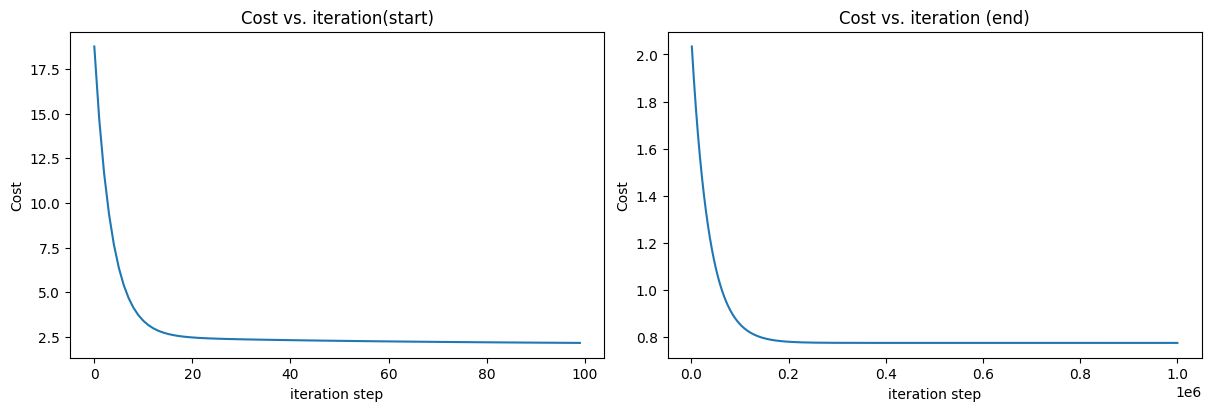

In [60]:
# plot cost versus iteration
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step')
plt.show()

In [77]:
w = np.array([0.05912871,0.07275394,0.01555315])
b = 4.40712211756168

x = np.array([151.5,41.3,58.5])
y = 16.5

print(compute_cost(X_train, y_train, w, b))
print(compute_model_output(x, w, b))

0.7756015026522047
17.27971867956168
